<H1 style="text-align:center;">
Data Understanding
</H1>
<hr style="height:5px;">

## Histograms
<hr style="height:2px;">

Histograms are generated by the function `hist`. The simplest way to create a histogram
is to just use the corresponding attribute as an argument of the function
`hist`, and R will automatically determine the number of bins for the histogram
based on Sturge’s rule. In order to generate the histogram for the petal length of the
Iris data set, the following command is sufficient:

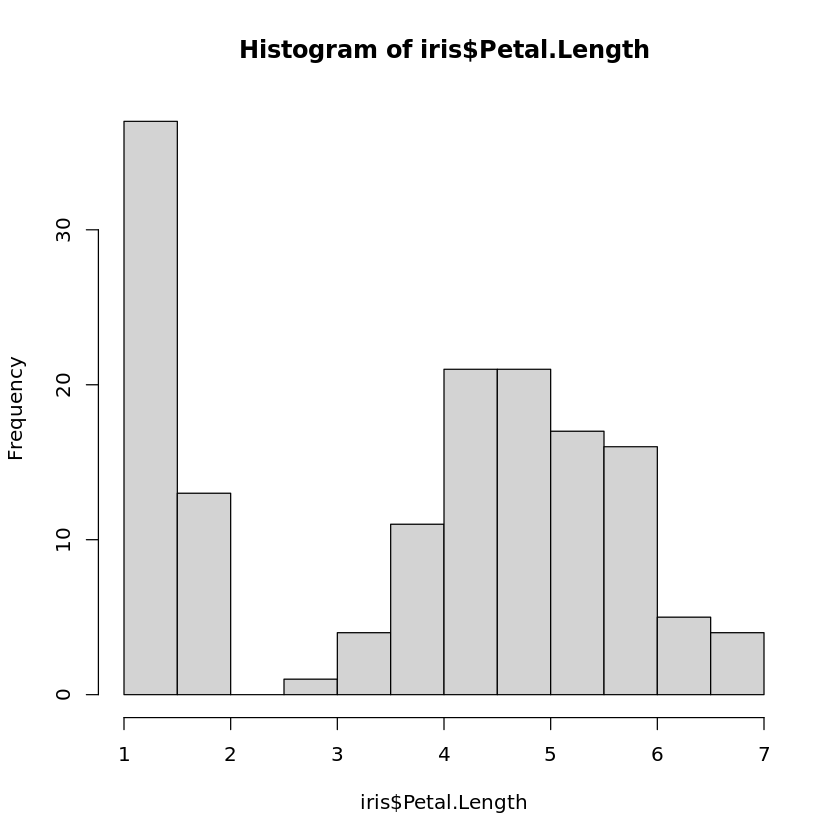

In [1]:
hist(iris$Petal.Length)

The partition into bins can also be specified directly. One of the parameters of `hist`
is breaks. If the bins should cover the intervals $[a_0, a_1), [a_1, a_2), . . . , [a_{k−1}, a_k ]$,
then one can simply create a vector in R containing the values $a_i$ and assign
it to breaks. Note that $a_0$ and $a_k$ should be the minimum and maximum values
of the corresponding attribute. If we want the boundaries for the bins at
1.0, 3.0, 4.5, 4.0, 6.1, then we would use

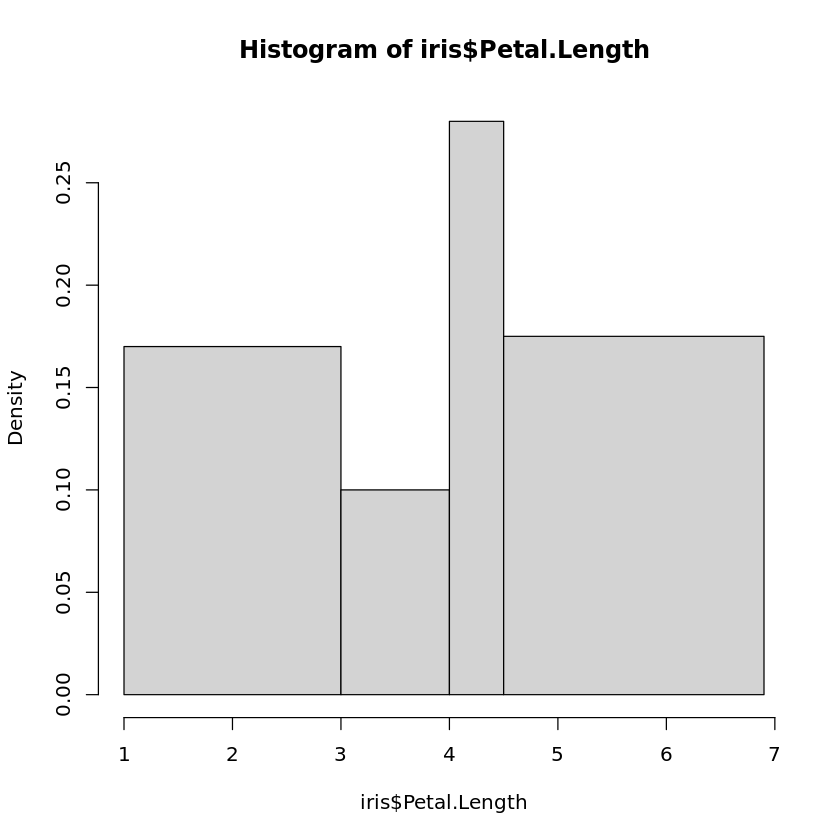

In [2]:
hist(iris$Petal.Length,breaks=c(1.0,3.0,4.5,4.0,6.9))

to generate the histogram. Note that in the case of bins with different length, the
heights of the boxes in the histogram do not show the relative frequencies. The
areas of the boxes are chosen in such a way that they are proportional to the relative
frequencies.

## Boxplots
<hr style="height:2px;">

A boxplot for a single attribute is generated by

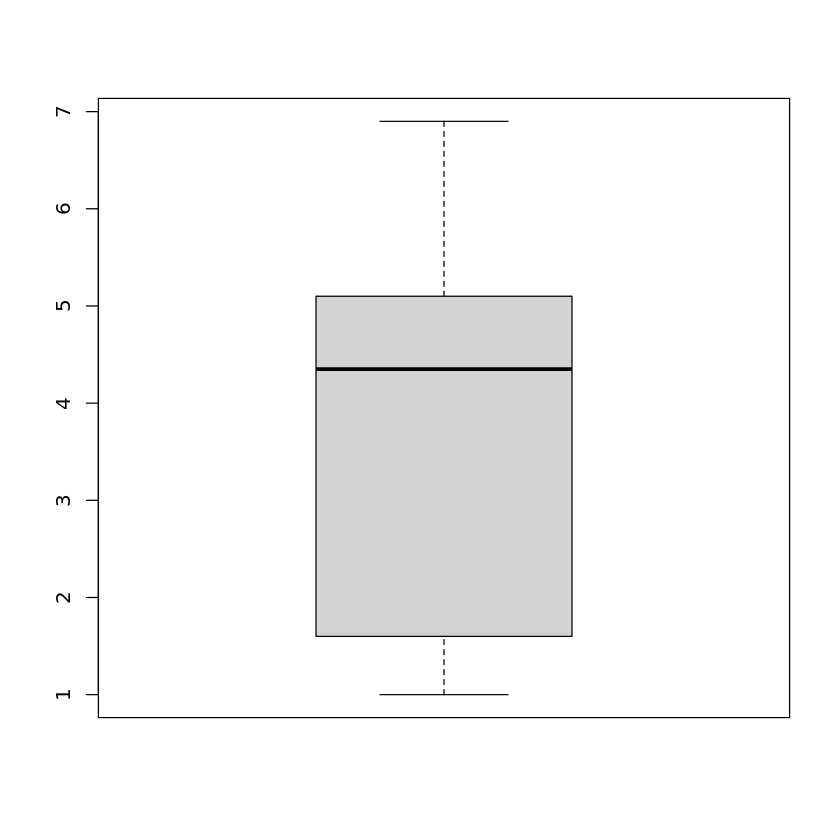

In [3]:
boxplot(iris$Petal.Length)

yielding the boxplot for the petal length of the Iris data set. Instead of a single
attribute, we can hand over more than one attribute

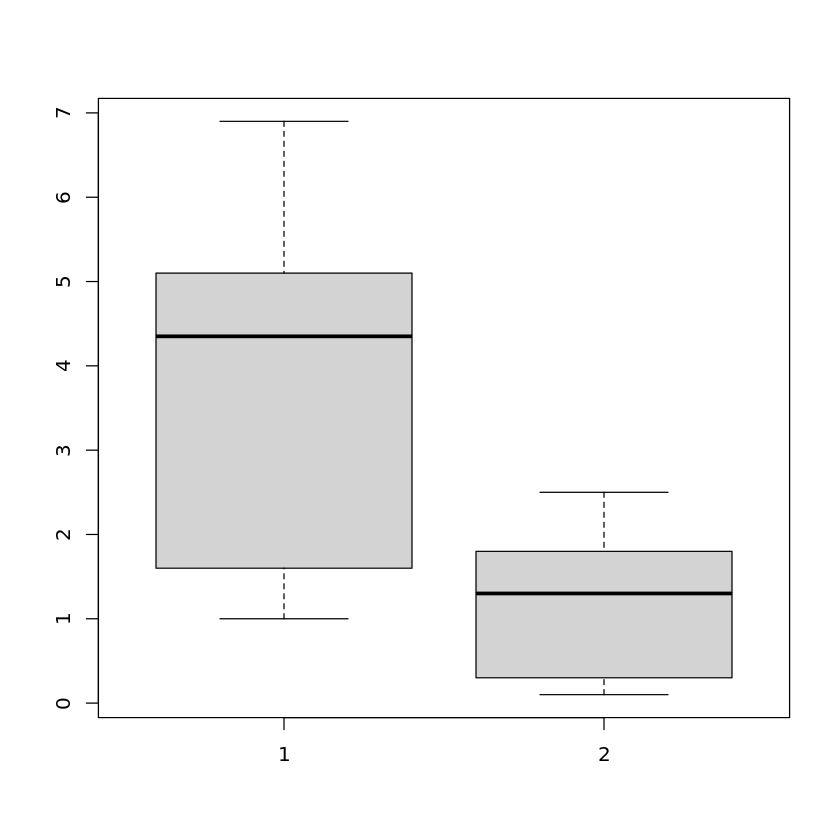

In [4]:
boxplot(iris$Petal.Length,iris$Petal.Width)

to show the boxplots in the same plot. We can even use the whole data set as an
argument to see the boxplots of all attributes in one plot:

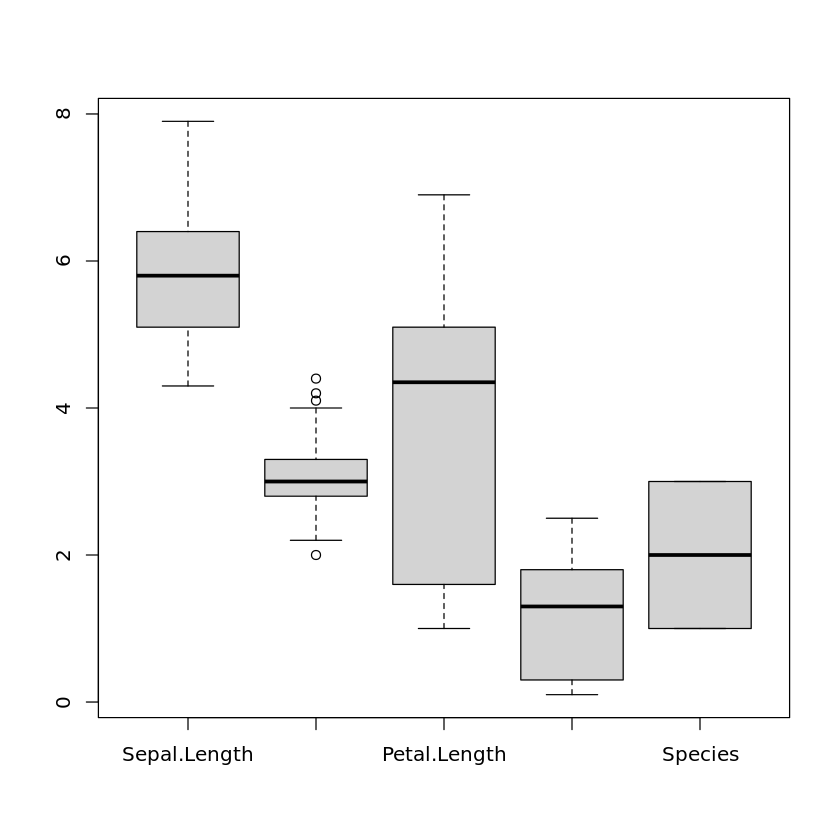

In [5]:
boxplot(iris)

In this case, categorical attributes will be turned into numerical attributes by coding
the values of the categorical attribute as 1, 2, . . . , so that these boxplots are also
shown but do not really make sense.

In order to include the notches in the boxplots, we need to set the parameter
`notch` to true:

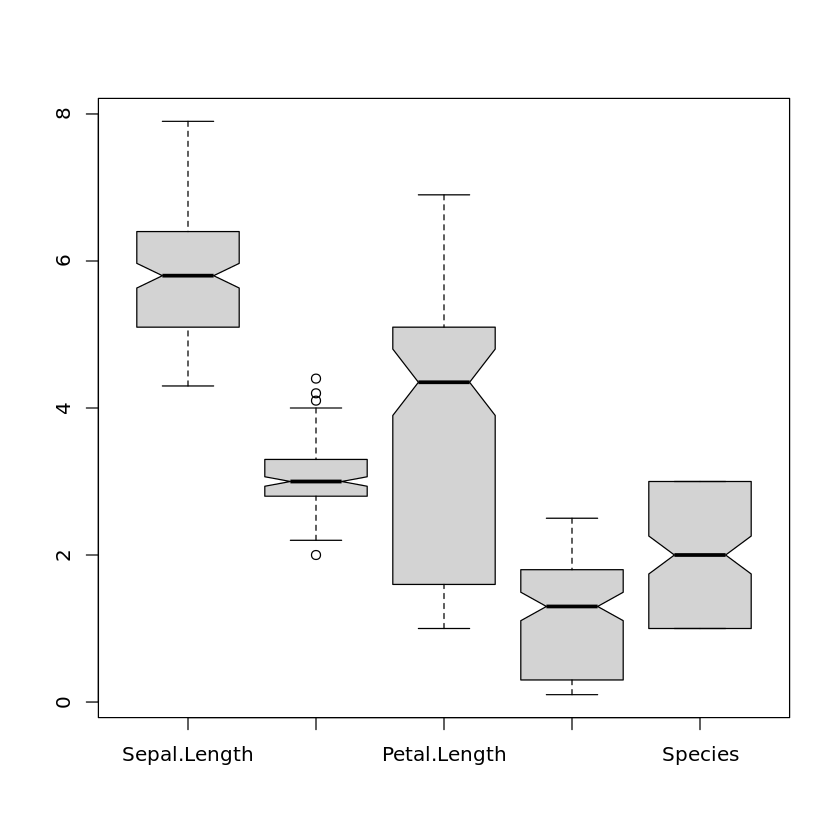

In [6]:
boxplot(iris,notch=TRUE)

If one is interested in the precise values of the boxplot like the median, etc., one can
use the print-command:

$stats
     [,1]
[1,]  2.2
[2,]  2.8
[3,]  3.0
[4,]  3.3
[5,]  4.0

$n
[1] 150

$conf
         [,1]
[1,] 2.935497
[2,] 3.064503

$out
[1] 4.4 4.1 4.2 2.0

$group
[1] 1 1 1 1

$names
[1] "1"



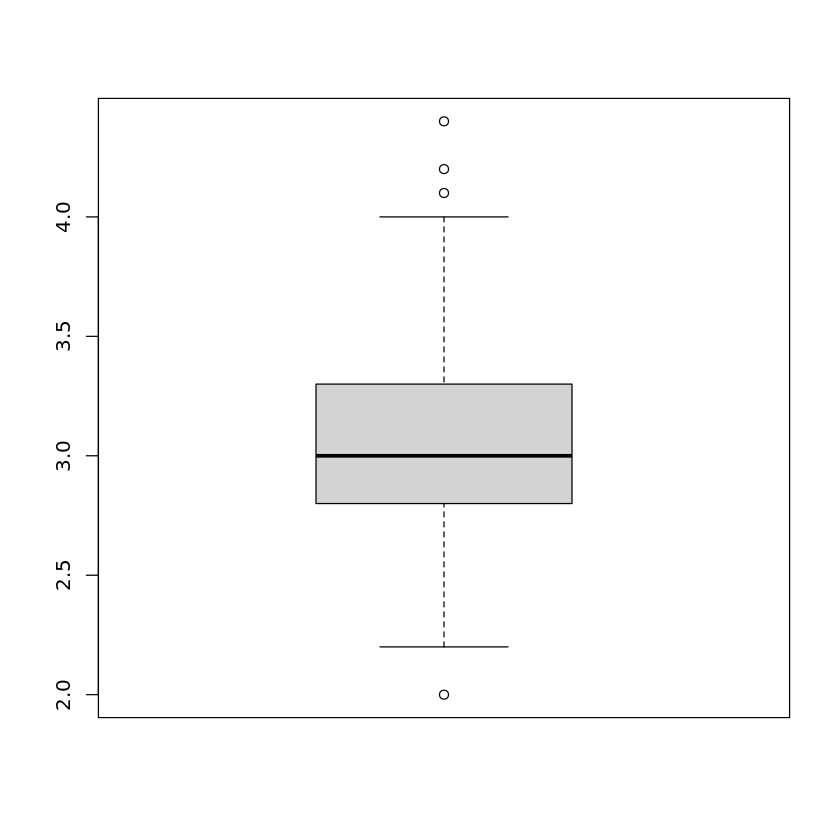

In [7]:
print(boxplot(iris$Sepal.Width))

The first five values are the minimum, the first quartile, the median, the third quartile,
and the maximum value of the attribute, respectively. $n$ is the number of data. Then
come the boundaries for the confidence interval for the notch, followed by the list of
outliers. The last values `group` and `names` only make sense when more than one
boxplot is included in the same plot. Then `group` is needed to identify to which
attribute the outliers in the list of outliers belong. `names` just lists the names of the
attributes.

## Scatter Plots
<hr style="height:2px;">

A scatter plot of the petal width against petal length of the Iris data is obtained by

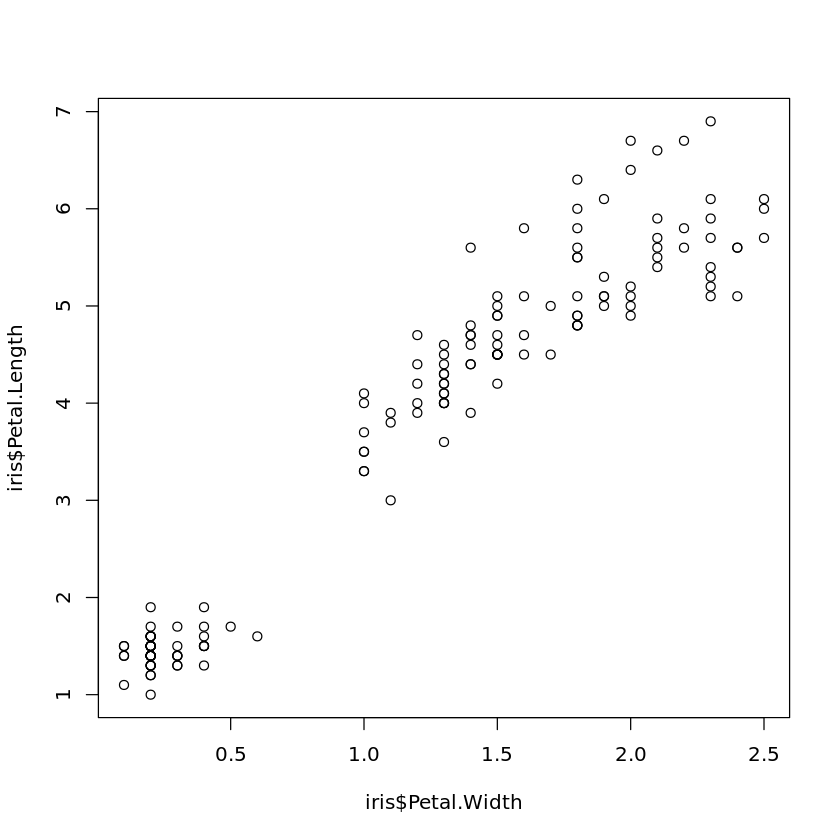

In [8]:
plot(iris$Petal.Width,iris$Petal.Length)

All scatter plots of each attribute against each other in one diagram are created with

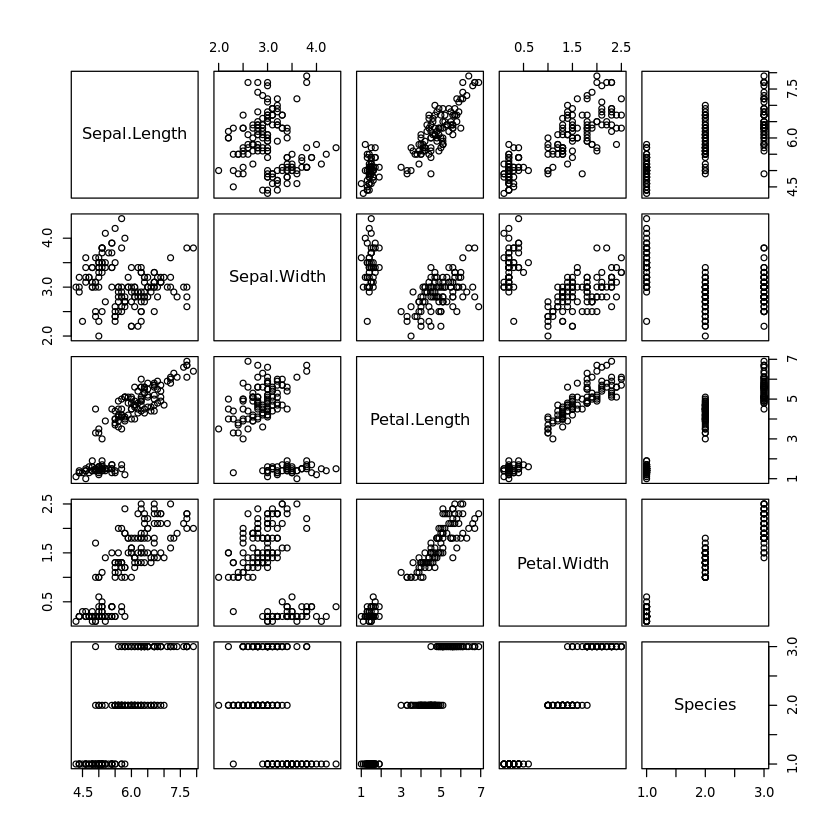

In [9]:
plot(iris)

If symbols representing the values for some categorical attribute should be included
in a scatter plot, this can be achieved by

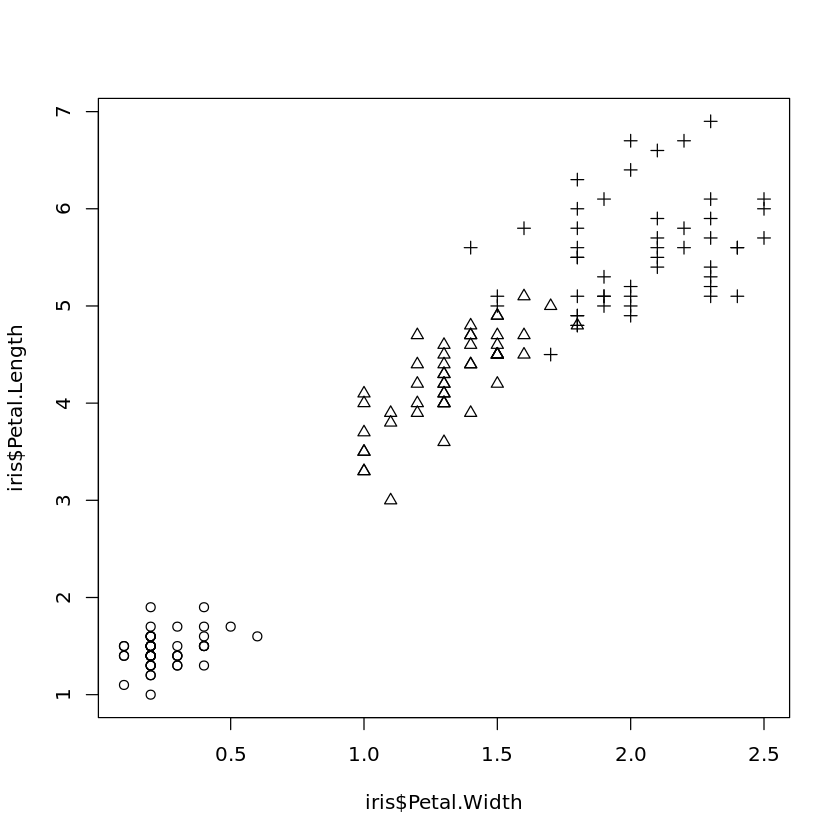

In [10]:
plot(iris$Petal.Width,iris$Petal.Length,pch=as.numeric(iris$Species))

where in this example the three types of Iris are plotted with different symbols.

If there are some interesting or suspicious points in a scatter plot and one wants
to find out which data records these are, one can do this by

integer(0)

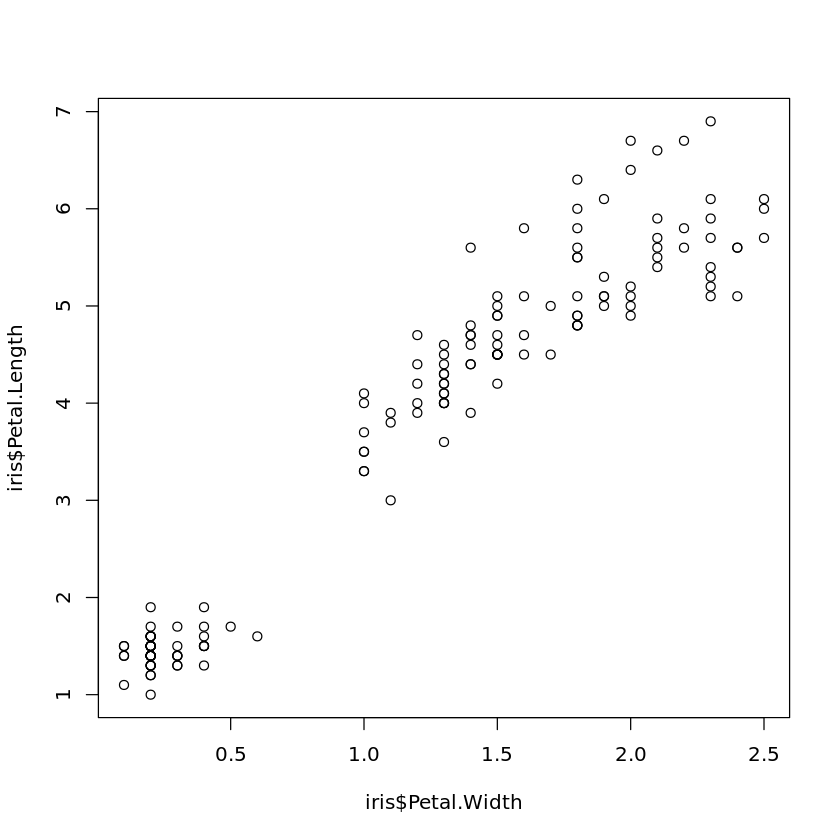

In [11]:
plot(iris$Petal.Width,iris$Petal.Length)
identify(iris$Petal.Width,iris$Petal.Length)

and then clicking on the points. The index of the corresponding records will be
added to the scatter plot. To finish selecting points, press the ESCAPE-key.

Jitter can be added to a scatter plot in the following way:

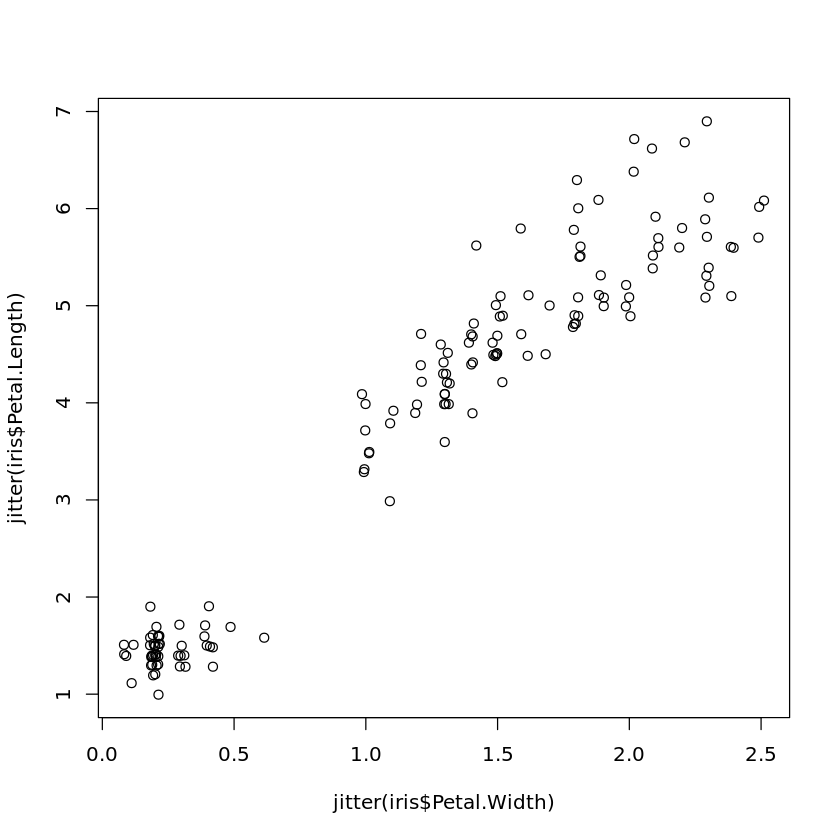

In [12]:
plot(jitter(iris$Petal.Width),jitter(iris$Petal.Length))

Intensity plots and density plots with hexagonal binning, as they are shown Fig. 4.9,
can be generated by

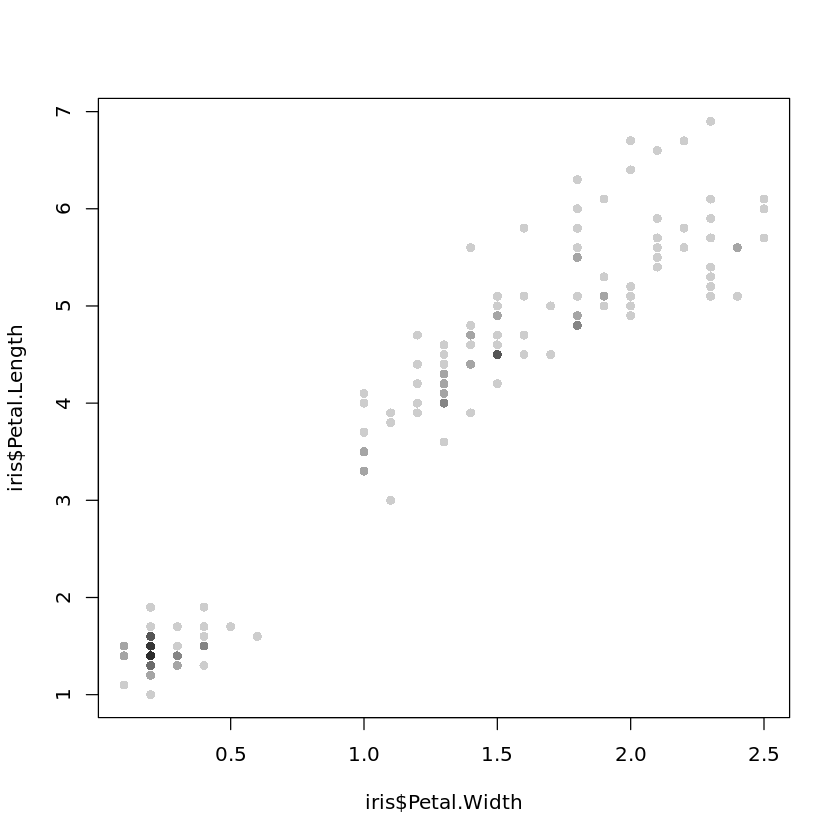

In [13]:
plot(iris$Petal.Width,iris$Petal.Length,
     col=rgb(0,0,0,50,maxColorValue=255),pch=16)

and

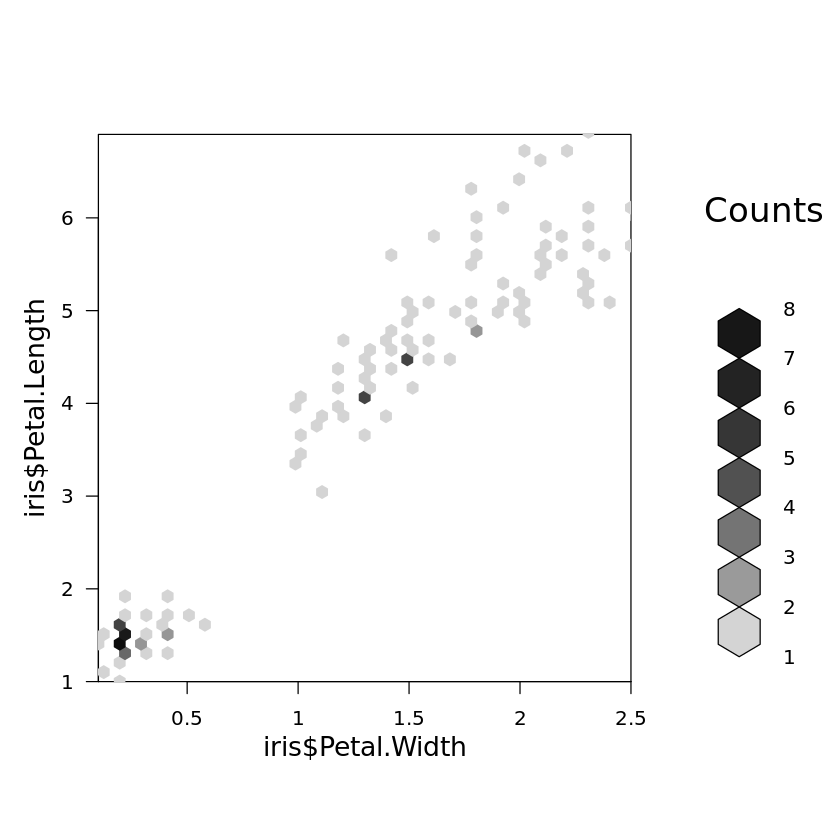

In [14]:
library(hexbin)
bin<-hexbin(iris$Petal.Width,iris$Petal.Length,xbins=50)
plot(bin)

respectively, where the library `hexbin` does not come along with the standard version
of R and needs to be installed as described in the appendix on R. Note that such
plots are not very useful for such a small data sets like the Iris data set.

For three-dimensional scatter plots, the library `scatterplots3d` is needed
and has to be installed first:

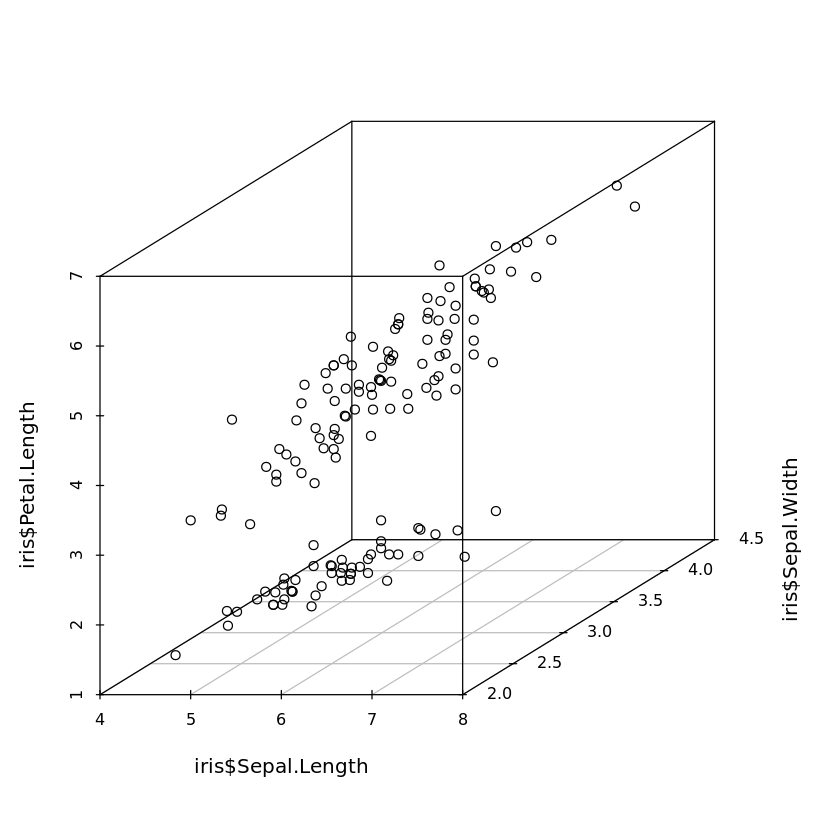

In [15]:
library(scatterplot3d)
scatterplot3d(iris$Sepal.Length,iris$Sepal.Width,iris$Petal.Length)

## Principal Component Analysis
<hr style="height:2px;">

PCA can be carried out with R in the following way:

In [17]:
species <- which(colnames(iris)=="Species")
iris.pca <- prcomp(iris[,-species],center=T,scale=T)
print(iris.pca)

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


In [18]:
summary(iris.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

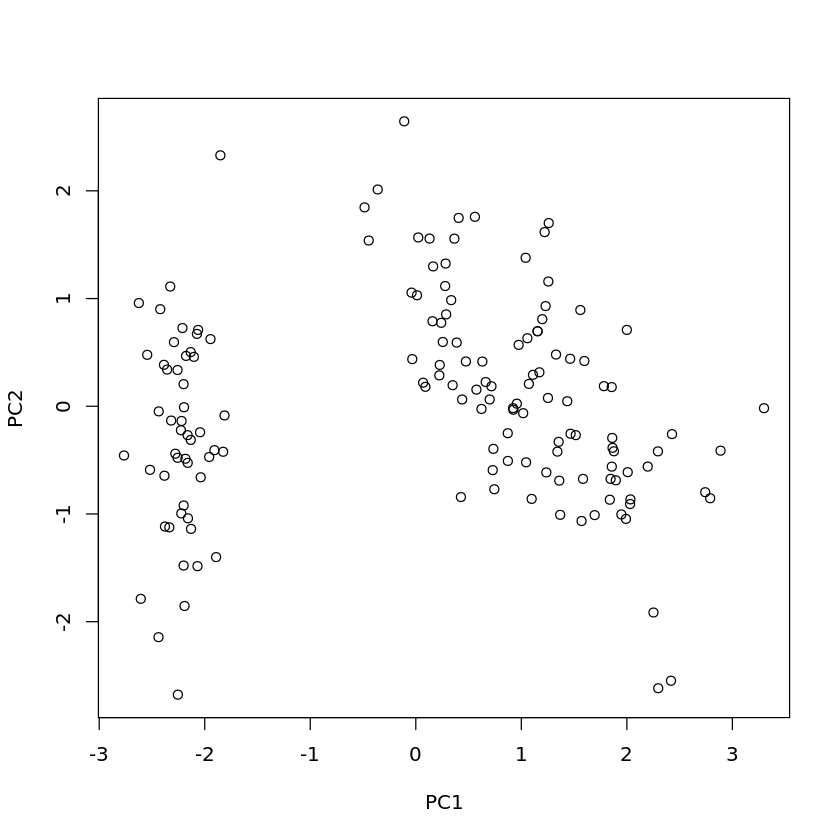

In [19]:
plot(predict(iris.pca))

For the Iris data set, it is necessary to exclude the categorical attribute *`Species`*
from PCA. This is achieved by the first line of the code and calling `prcomp` with
`iris[,-species]` instead of `iris`.

The parameter settings `center=T`, `scale=T`, where `T` is just a short form of
`TRUE`, mean that z-score standardization is carried out for each attribute before
applying PCA.

The function `predict` can be applied in the above-described way to obtain
the transformed data from which the PCA was computed. If the computed PCA
transformation should be applied to another data set `x`, this can be achieved by
```
predict(iris.pca,newdata=x)
```


where `x` must have the same number of columns as the data set from which the PCA
has been computed. In this case, `x` must have four columns which must be numerical.
`predict` will compute the full transformation, so that the above command
will also yield transformed data with four columns.

## Multidinemsional Scaling
<hr style="height:2px;">

MDS requires the library `MASS` which is not included in the standard version of R
and needs installing. First, a distance matrix is needed for MDS. Identical objects
leading to zero distances are not admitted. Therefore, if there are identical objects
in a data set, all copies of the same object except one must be removed. In the Iris
data set, there is only one pair of identical objects, so that one of them needs to
be removed. The `Species` is not a numerical attribute and will be ignored for the
distance.

Initial stress        : 0.00678
stress after  10 iters: 0.00404, magic = 0.500
stress after  12 iters: 0.00402


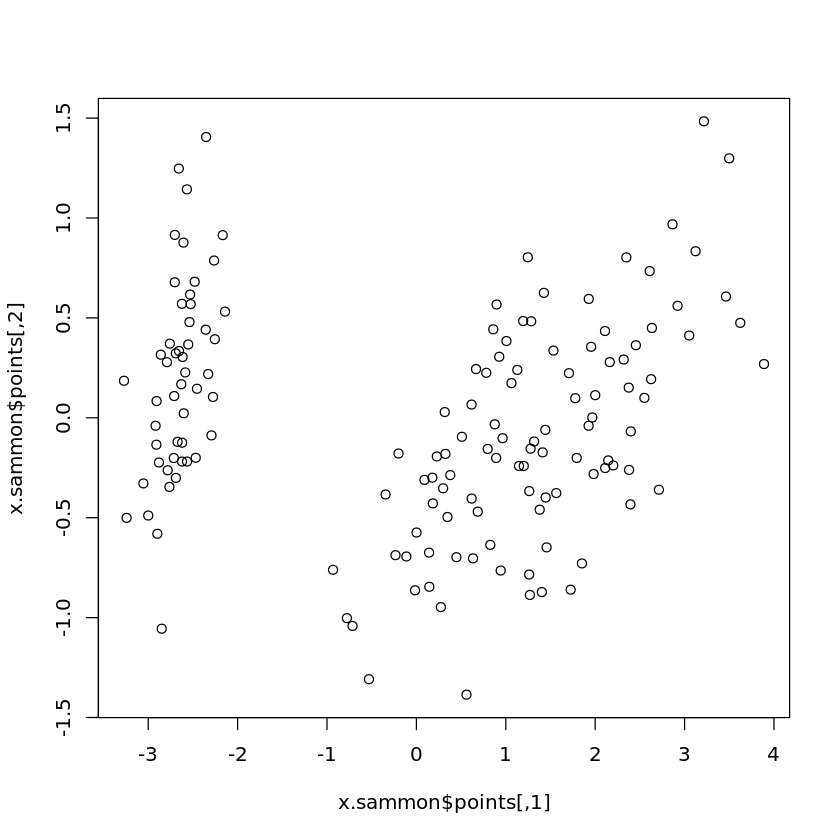

In [21]:
library(MASS)
x <- iris[-102,]
species <- which(colnames(x)=="Species")
x.dist <- dist(x[,-species])
x.sammon <- sammon(x.dist,k=2)
plot(x.sammon$points)

`k = 2` means that MDS should reduce the original data set to two dimensions.

Note that in the above example code no normalization or z-score standardization
is carried out.

## Parallel Coordinates, Radar, and Star Plots
<hr style="height:2px;">

Parallel coordinates need the library `MASS`. All attributes must be numerical. If the
attribute *`Species`* should be included in the parallel coordinates, one can achieve this
in the following way:

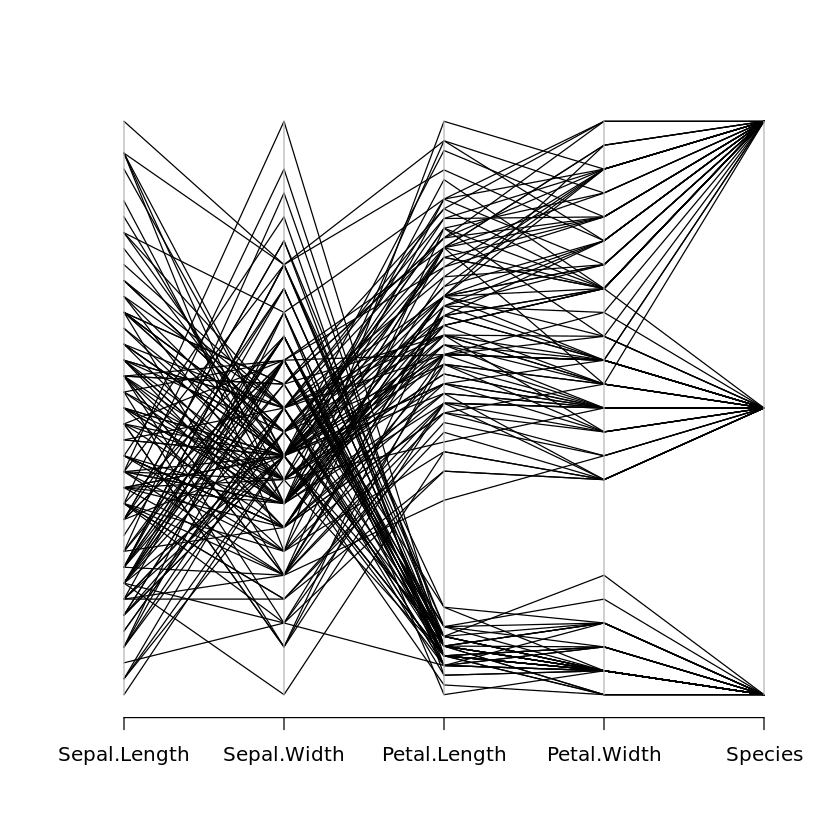

In [22]:
library(MASS)
x <- iris
x$Species <- as.numeric(iris$Species)
parcoord(x)

Star and radar plots are obtained by the following two commands:

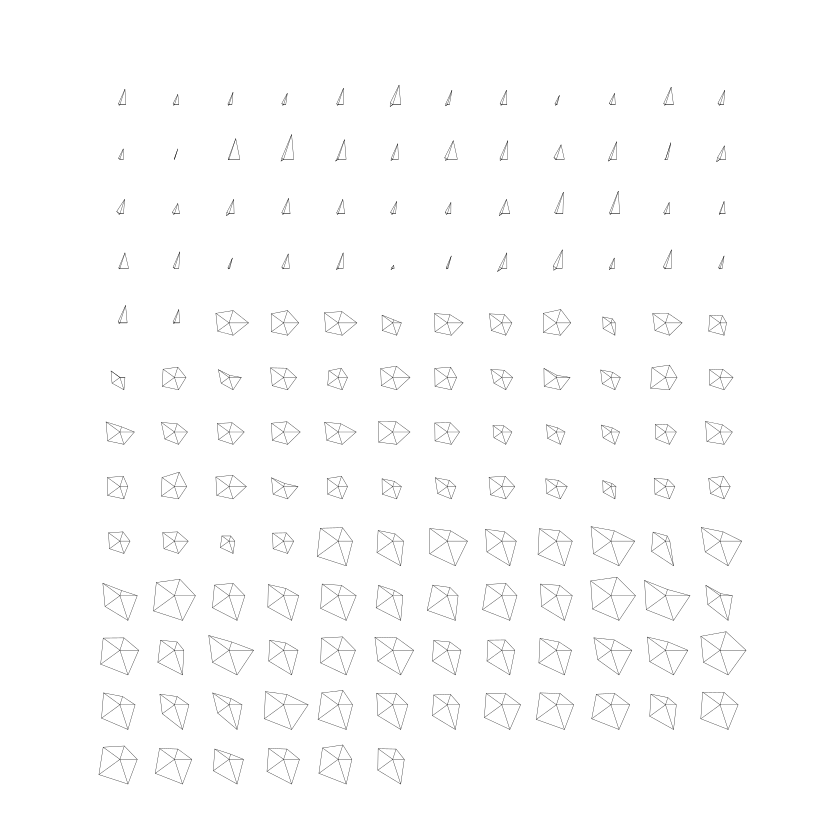

In [23]:
stars(iris)

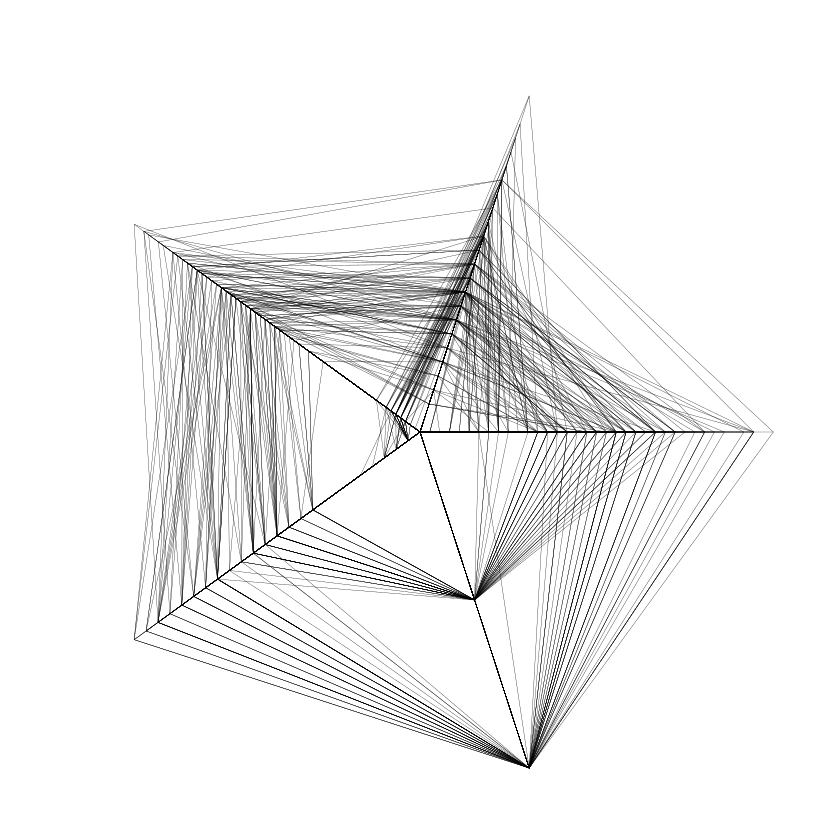

In [24]:
stars(iris,locations=c(0,0))

## Correlation Coefficients
<hr style="height:2px;">

Pearson’s, Spearman’s, and Kendall’s correlation coefficients are obtained by the
following three commands:

In [ ]:
cor(iris$Sepal.Length,iris$Sepal.Width)
cor.test(iris$Sepal.Length,iris$Sepal.Width,method="spearman")
cor.test(iris$Sepal.Length,iris$Sepal.Width,method="kendall")

## Grubbs Test for Outlier Detection
<hr style="height:2px;">

Grubbs test for outlier detection needs the installation of the library `outliers`:

In [29]:
library(outliers)
grubbs.test(iris$Petal.Width)


	Grubbs test for one outlier

data:  iris$Petal.Width
G = 1.70638, U = 0.98033, p-value = 1
alternative hypothesis: highest value 2.5 is an outlier
